<a href="https://colab.research.google.com/github/kajok88/Intro2AI/blob/main/teht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

[[   8.34   40.77 1010.84   90.01  480.48]
 [  23.64   58.49 1011.4    74.2   445.75]
 [  29.74   56.9  1007.15   41.91  438.76]
 [  19.07   49.69 1007.22   76.79  453.09]
 [  11.8    40.66 1017.13   97.2   464.43]]
[480.48 445.75 438.76 453.09 464.43]
Coefficients and scaled coordinates: 
Ans w= 
[-14.73659333  -2.97242952   0.36867791  -2.30751179]
454.36500940635386


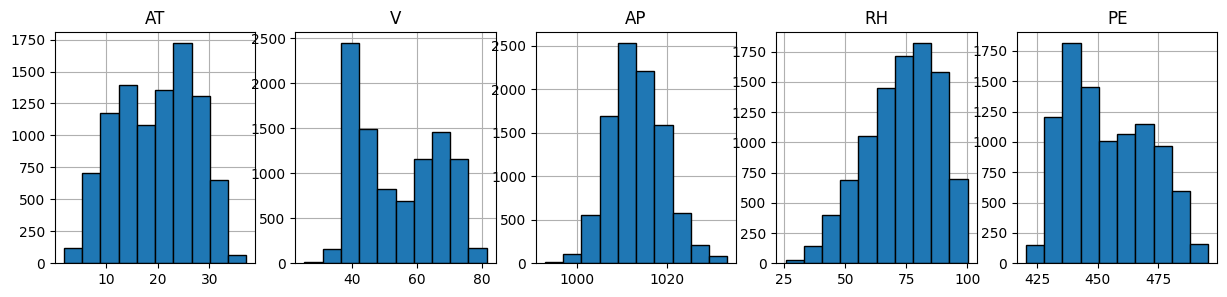

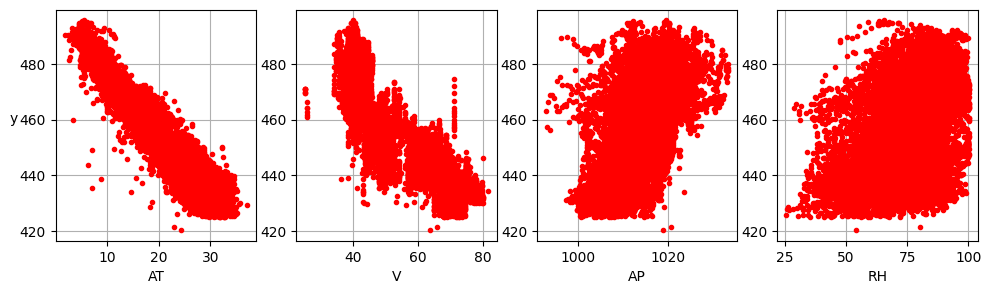

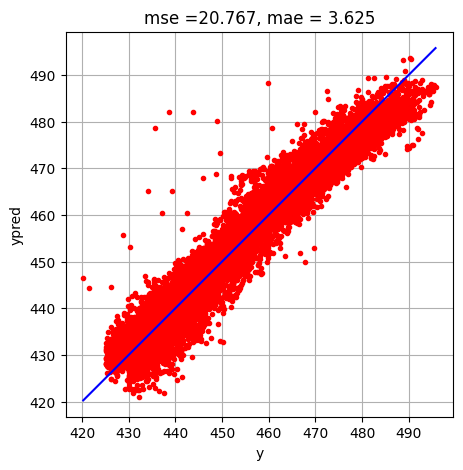

In [5]:
#-----------------------
#-- Linear regression --
#-----------------------

# Teht. 1

# Read the headers
with open('Folds5x2_pp.csv', 'r') as f:
    headers = f.readline().strip().split(',')
#read the dataset into a matrix data
data=np.loadtxt('Folds5x2_pp.csv', delimiter=',', skiprows=1)
X=data[:,:5] #coodinates [x1,x2,x3,x4]=[T,V,AP,RH] as rows
y=data[:,4] #values of PE to be predicted

m,n=data.shape
# print(m)
# print(n)

# print("-------------------")
print(X[:5,:])
print(y[:5])

#distribution of values of the variables
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.hist(X[:,k],10,edgecolor='k',zorder=2)
  plt.grid()
  plt.title(headers[k])

#dependency of y of the variables x1-x4
plt.figure(figsize=(15,3))
for k in range(4):
  plt.subplot(1,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.grid()
  plt.xlabel(headers[k])
  if k==0:
    plt.ylabel('y',rotation=0)


# Coefficients and scaled coordinates

X = data[:, :4]
y = data[:, 4]

#scaled coordinates, means=0 and standard deviations=1
mu=np.mean(X,axis=0) #means of the coordinates of the datapoints, [mu1,mu2,mu3,mu4]
#print(mu)
s=np.std(X,axis=0) #standard deviations of the coordinates, [s1,s2,s3,s4]
#print(s)
Xhat=(X-mu)/s #scaled coordinates, [(x1-mu1)/s1,(x2-mu2)/s2,(x3-mu3)/s3,(x4-mu4)/s4]

#coefficients for the formula using the scaled coordinates
model_hat=LinearRegression().fit(Xhat,y)
print("Coefficients and scaled coordinates: ")
print("Ans w= ")
what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)


#predicted values for y from the formula
ypred=np.sum(what*Xhat,axis=1)+bhat

#minimum value of the cost
#mse=mean squared error
mse=1/m*np.sum((ypred-y)**2)
#print(mse)
#mae=mean average error
mae=1/m*np.sum(np.abs(ypred-y))
#print(mae)

#given y vs. predicted y
ymin=np.min(y)
ymax=np.max(y)

plt.figure(figsize=(5,5))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.title('mse =' + str(round(mse, 3)) + ', ' + 'mae = ' + str(round(mae, 3)))
plt.show()


w1 = 0.9908, w2 = 1.967, b = -4.028


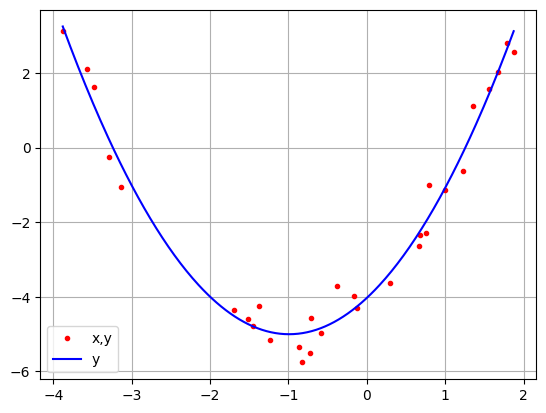

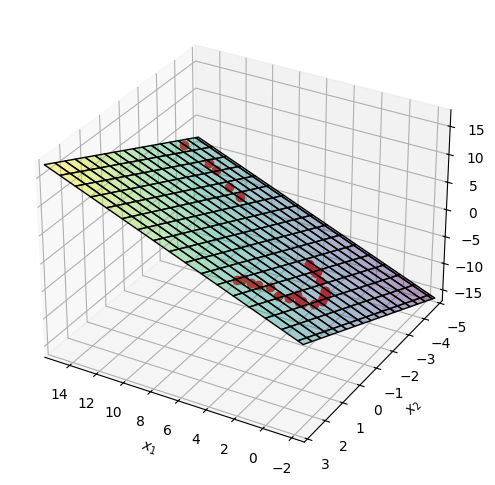

In [2]:
# Teht. 2

#points x^(i),y^(i)
m=30 #number of points
A=1
B=2
C=-4
x0=-B/(2*A)
L=3
np.random.seed(0)

x=np.random.uniform(x0-L,x0+L,m) #uniformly from x0-L...x0+L
error=np.random.normal(0,0.4,m)
y=A*x**2+B*x+C+error

# design matrix = x^2, x, 1
X = np.column_stack((x**2, x, np.ones_like(x)))

# weights using normal equation
w = np.linalg.inv(X.T@X)@X.T@y

w1 = w[0]
w2 = w[1]
b = w[2]

print(f"w1 = {w1:.4}, w2 = {w2:.4}, b = {b:.4}")

x_fit = np.linspace(x.min(), x.max(), 300)
y_fit = w1 * x_fit**2 + w2 * x_fit + b

plt.plot(x, y, 'r.', label='x,y')
plt.plot(x_fit, y_fit, 'b-', label='y')
plt.grid()
plt.legend()
plt.show()


x1_range = np.linspace(15.5, -2.5, 50)
x2_range = np.linspace(3, -5, 50)
x1_plane, x2_plane = np.meshgrid(x1_range, x2_range)

y_plane = w1*x1_plane+w2*x2_plane+b

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

# Surface plot for the plane
ax.plot_surface(x1_plane, x2_plane, y_plane, rstride=3, cstride=3, cmap='viridis', edgecolor='black', alpha=0.4)
ax.set_xlim([15.5, -2.5])
ax.set_ylim([3, -5])

x1 = x**2
x2 = x
ax.plot3D(x1, x2, y, 'ro')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

plt.show()

w1: 0.9872851738355946, w2: 1.9607965289115648, b: -4.010642128607478


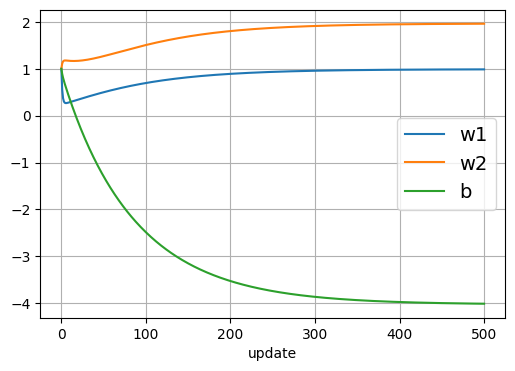

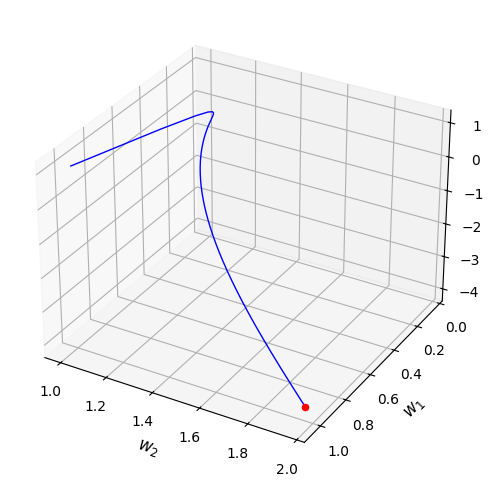

In [3]:
# Teht 3

w1, w2, b = 1, 1, 1
alfa=0.01
N=500
W1=np.zeros(N+1)
W2=np.zeros(N+1)
B=np.zeros(N+1)

W1[0]=w1
W2[0]=w2
B[0]=b



for n in range(N):
    y_pred = w1*x1 + w2*x2 + b

    dw1 = (2 / m) * np.sum((y_pred - y) * x1)
    dw2 = (2 / m) * np.sum((y_pred - y) * x2)
    db = (2 / m) * np.sum(y_pred - y)

    w1 -= alfa * dw1
    w2 -= alfa * dw2
    b -= alfa * db

    W1[n+1]=w1
    W2[n+1]=w2
    B[n+1]=b


print(f"w1: {w1}, w2: {w2}, b: {b}")

#graphs of the coefficients
plt.figure(figsize=(6,4))
plt.plot(W1,label='w1')
plt.plot(W2,label='w2')
plt.plot(B,label='b')
plt.xlabel('update')
plt.legend(fontsize=14)
plt.grid()
plt.show()


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(W2, W1, B, color='blue', linewidth=1)
ax.scatter(W2[-1], W1[-1], B[-1], color='red')
ax.set_ylim(1.1,0)

# Add labels
ax.set_xlabel('$w_2$', fontsize=12)
ax.set_ylabel('$w_1$', fontsize=12)
ax.set_zlabel('$b$', fontsize=12)

plt.show()